In [1]:
#importing some stuff, not sure what we will need yet
!pip install -q tensorflow-model-optimization

import tempfile
import os
import time

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import random

from tensorflow import keras
import tensorflow_model_optimization as tfmot

In [2]:
#Loading Training CSV data
train=pd.read_csv("sign_mnist_train.csv")
print(train.shape)
train.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
#Loading Testing CSV data
test=pd.read_csv("sign_mnist_test.csv")
print(train.shape)
test.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [66]:
#Next we must seperate the labels from the data
label_train=train["label"]
label_test=test["label"]

img_train=train.drop(['label'],axis=1)
img_test=test.drop(['label'],axis=1)

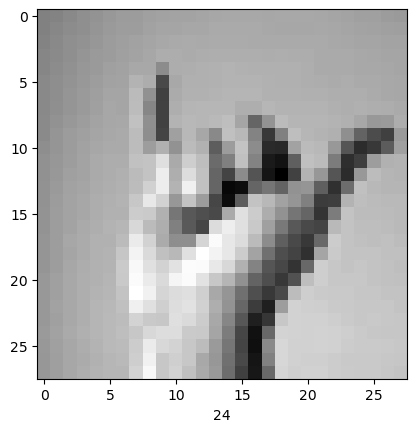

In [40]:
#visualizing what a random image looks like in the dataset to ensure accuracy
sampImg = random.randint(0,len(img_train.index))
fig, ax = plt.subplots()
i=img_train.iloc[sampImg].to_numpy()
i=i.reshape((28,28))
ax.imshow(i, cmap = 'gray')
ax.set_xlabel(label_train.iloc[sampImg])
plt.show()

#A=0
#B=1
#C=2
#etc

In [72]:
#reshaping the data into a MNIST type format and scaling image values
img_train_reshaped = img_train.values.reshape(-1,28,28,1)
img_test_reshaped = img_test.values.reshape(-1,28,28,1)



In [88]:
# Normalize the input image so that each pixel value is between 0 and 1.
train_images = img_train_reshaped / 255.0
test_images = img_test_reshaped / 255.0

# Define the model architecture.
model = tf.keras.models.Sequential()

#adding CNN layers to model
model.add(layers.Conv2D(filters = 10, kernel_size = (5,5),strides=1, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 6, kernel_size = (3,3) ,strides=1, padding = 'same', activation = 'relu', input_shape = (14,14,10)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 2, kernel_size = (5,5),strides=(1), padding = 'same', activation = 'relu'))
model.add(layers.AveragePooling2D(pool_size = (2,2)))

#adding fully connected output layers to model
model.add(layers.Flatten())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Save untrained model
model.save('untrained_signLang_model.h5')

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [89]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(img_train_reshaped, label_train, epochs=10, 
                    validation_data=(img_test_reshaped, label_test))

Epoch 1/10


c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Maxwell Norris\AppData\Local\Temp\ipykernel_3416\3877028860.py", line 6, in <module>
      history = model.fit(img_train_reshaped, label_train, epochs=10,
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\losses.py", line 2354, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\Users\Maxwell Norris\.conda\envs\ensf-ml\lib\site-packages\keras\src\backend.py", line 5762, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 24 which is outside the valid range of [0, 10).  Label values: 19 23 2 8 6 13 22 11 16 14 14 2 17 14 2 6 21 5 20 2 14 2 22 3 20 21 14 14 23 18 18 24
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_2663]